<a href="https://colab.research.google.com/github/AlfathanHidayat/UAS-Analisis-Data-Kompleks-Perminyakan/blob/main/Model_Unsupervised_Facies_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  #ini adalah syntax untuk upload file data


Saving facies_data2.csv to facies_data2 (1).csv
User uploaded file "facies_data2 (1).csv" with length 196104 bytes


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/content/facies_data2.csv")
df.head()
# menampilkan data csv


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [10]:
df.describe()
#menampilkan ringkasan statistik dari Data

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


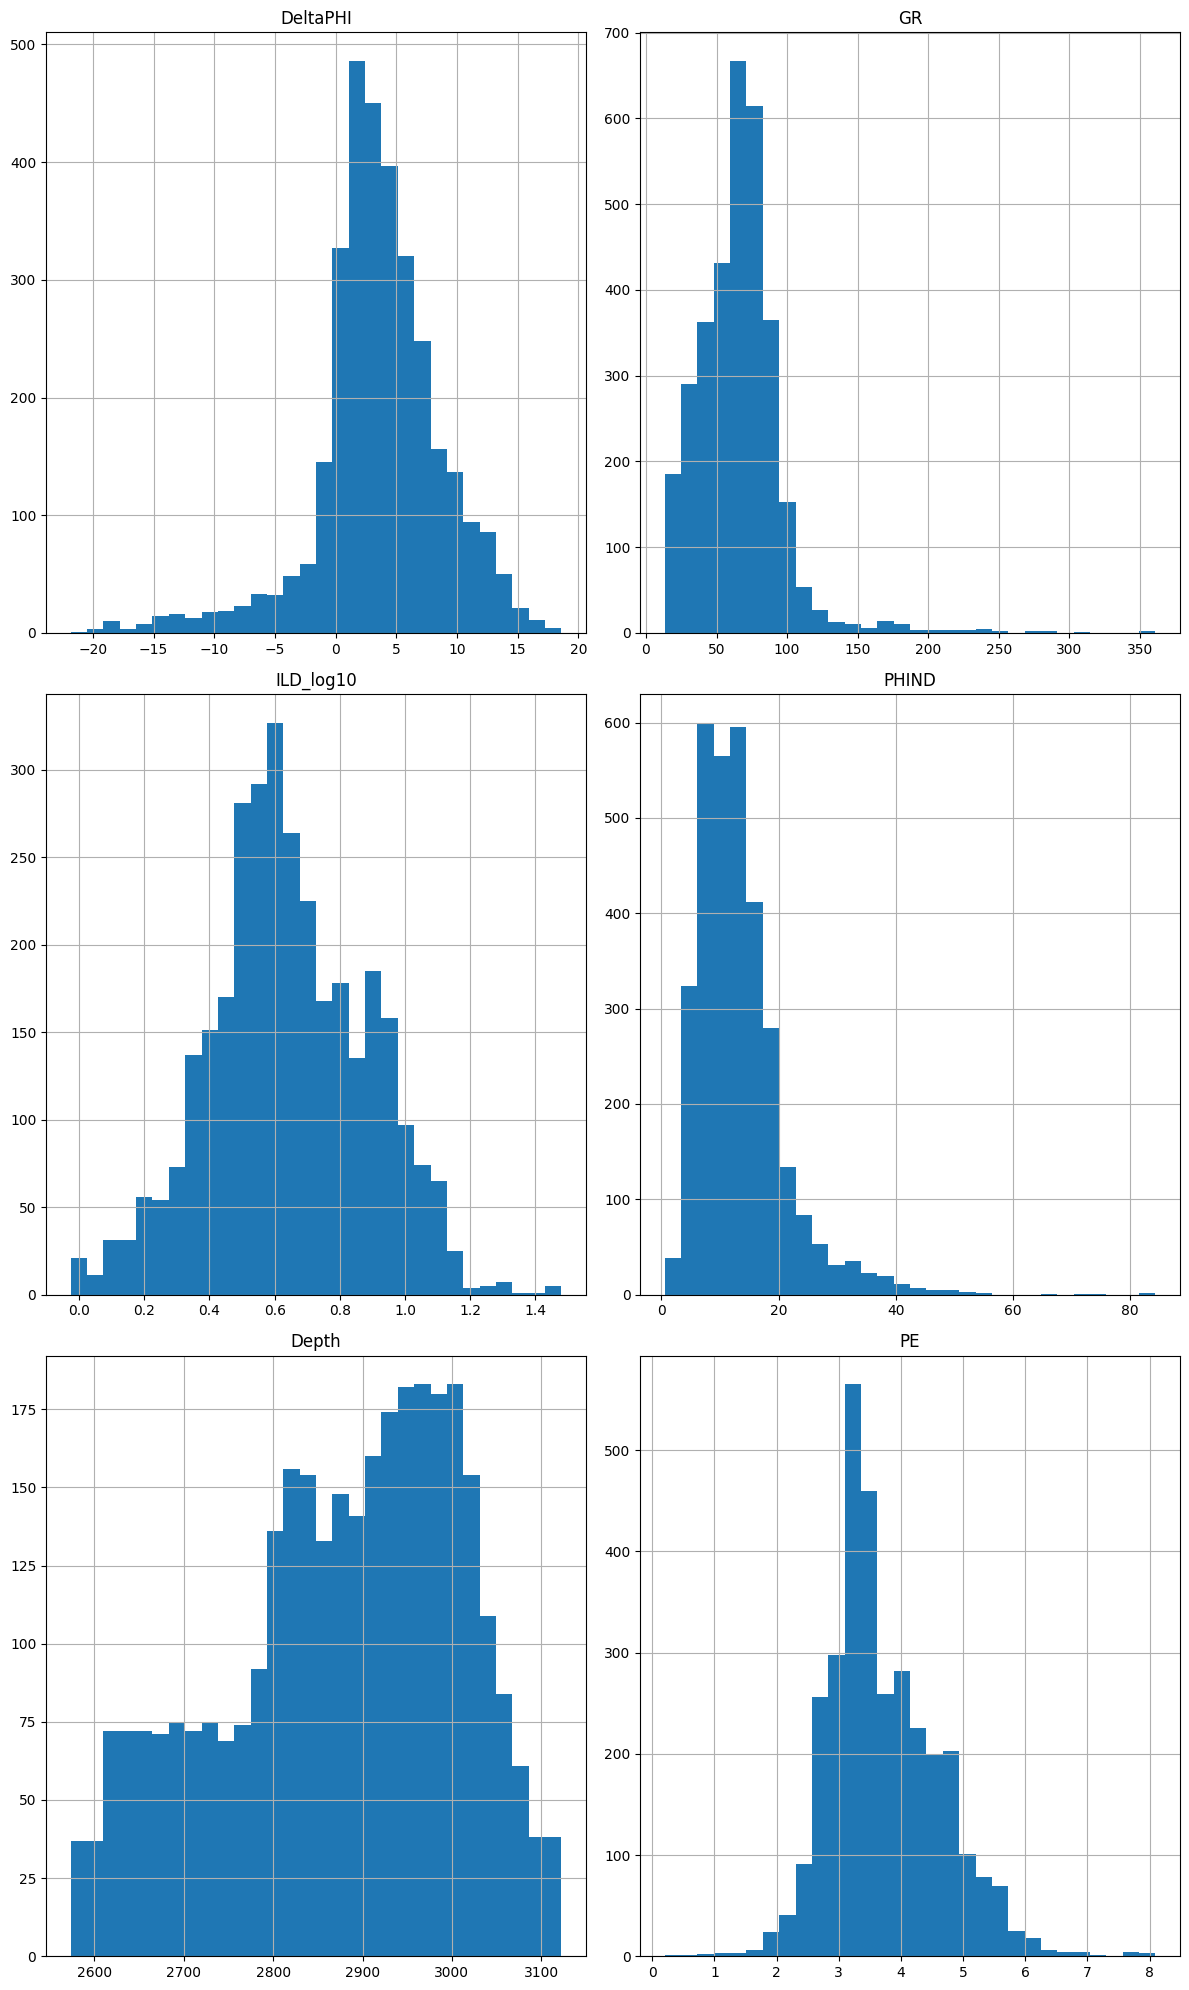

In [11]:
stat = df[['DeltaPHI','GR','ILD_log10','PHIND','Depth','PE']]
stat.hist (figsize=(12,20),bins=30)
plt.tight_layout()
plt.show()
# memilih beberapa kolom data terus cek sebaran nilainya lewat histogram agar gampang dianalisis

Grafik ini menunjukkan:

	•	Distribusi nilai masing-masing parameter log

	•	Apakah datanya normal, miring (skewed), atau memiliki anomali

	•	Gambaran awal karakter formasi

<Axes: >

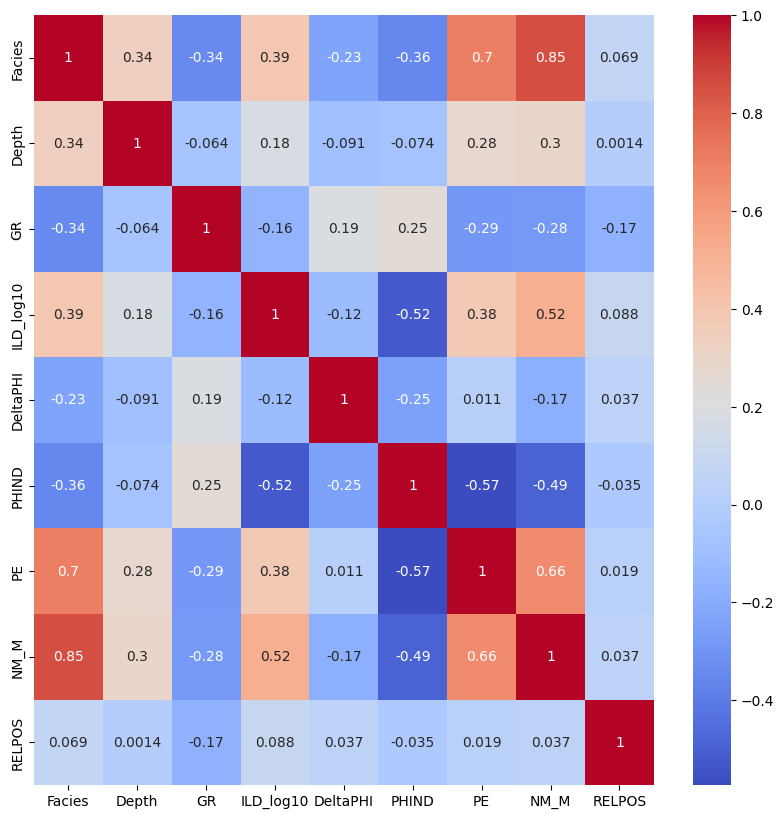

In [12]:
df2 = df.corr (method='pearson' , numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(df2, cmap='coolwarm',annot=True)
# menampilkan hasilnya dalam bentuk heatmap

korelasi ini saya gunakan untuk melihat hubungan antar fitur.
Terlihat bahwa GR memiliki korelasi negatif dengan PHIND, yang sesuai konsep geologi bahwa zona shale (GR tinggi) umumnya memiliki porositas rendah.
Informasi ini penting dalam pemilihan fitur untuk proses clustering

In [13]:
df = df.sort_values("Depth").reset_index(drop=True)

depth = df["Depth"]
GR = df["GR"]
ILD_log10 = df["ILD_log10"]
DeltaPHI = df["DeltaPHI"]
PHIND = df["PHIND"]
PE = df["PE"]
# mengurutkan data berdasarkan kedalaman (Depth) lalu memisahkan tiap kolom penting ke dalam variabel masing-masing

Text(0, 0.5, 'DEPTH')

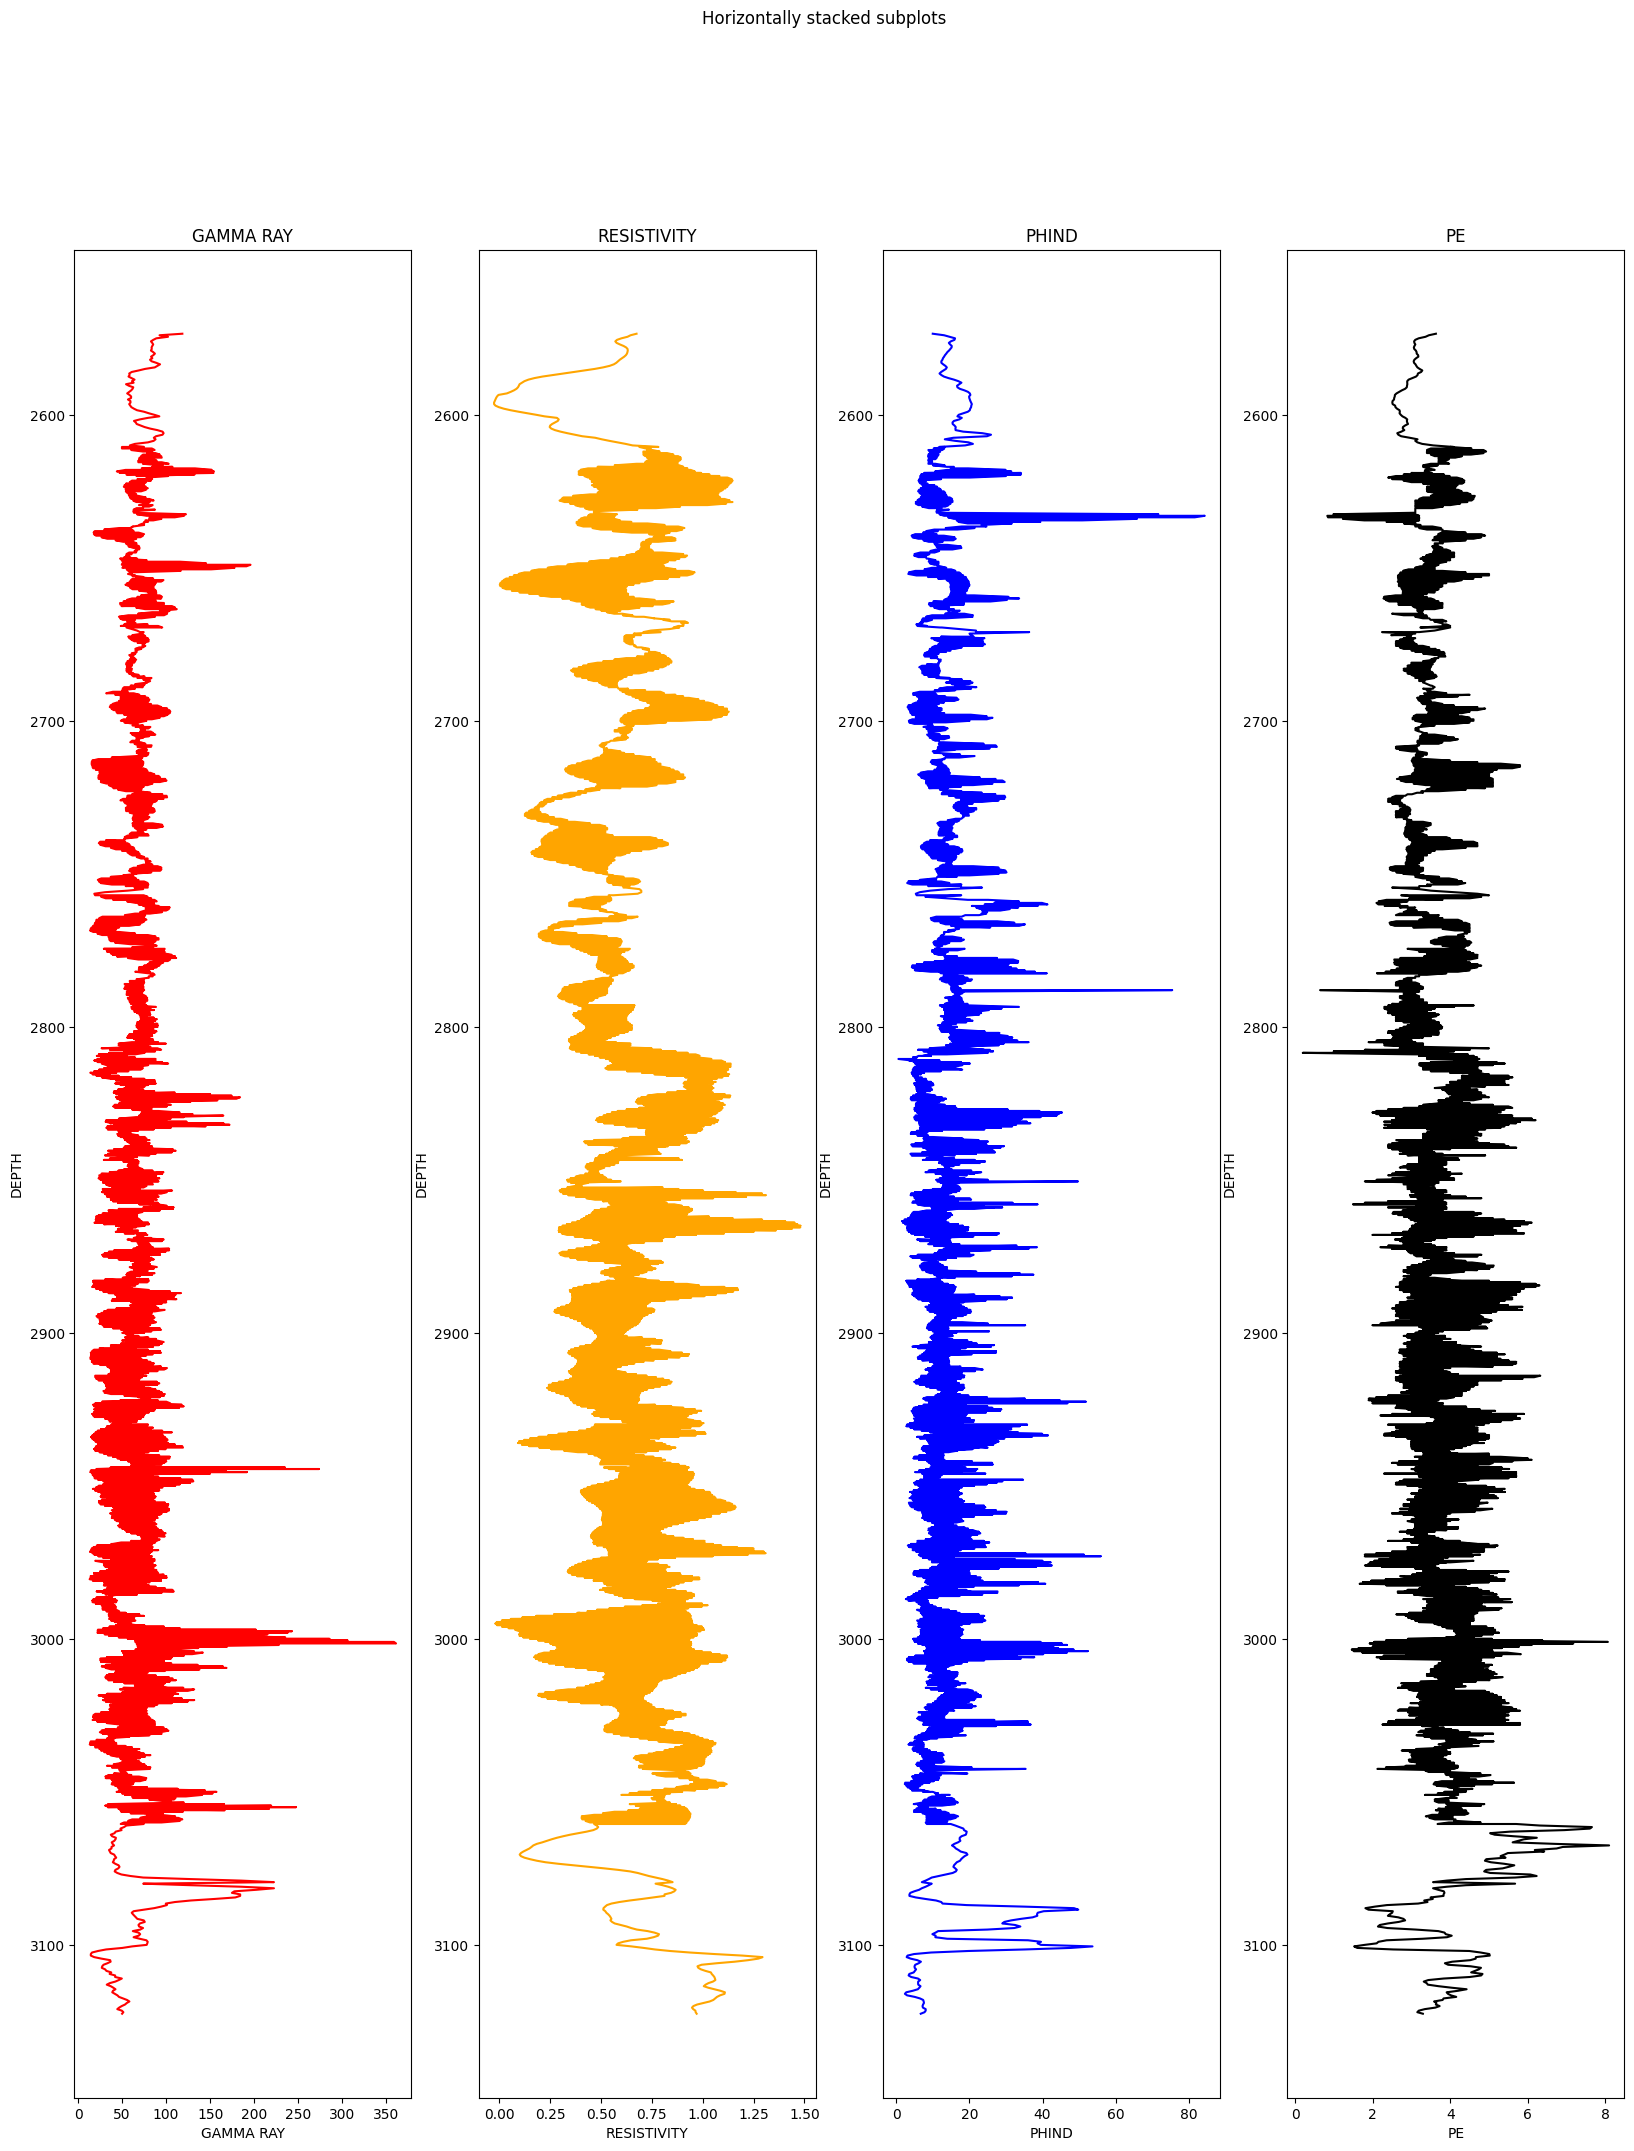

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots (1, 4, figsize=(20,24))
fig.suptitle('Horizontally stacked subplots')

ax1.plot(GR, depth, color='red')
ax1.invert_yaxis()
ax1.set_title('GAMMA RAY')
ax1.set_xlabel('GAMMA RAY')
ax1.set_ylabel('DEPTH')

ax2.plot(ILD_log10, depth, color='orange')
ax2.invert_yaxis()
ax2.set_title('RESISTIVITY')
ax2.set_xlabel('RESISTIVITY')
ax2.set_ylabel('DEPTH')

ax3.plot(PHIND, depth, color='blue')
ax3.invert_yaxis()
ax3.set_title('PHIND')
ax3.set_xlabel('PHIND')
ax3.set_ylabel('DEPTH')

ax4.plot(PE, depth, color='black')
ax4.invert_yaxis()
ax4.set_title('PE')
ax4.set_xlabel('PE')
ax4.set_ylabel('DEPTH')
# membuat 4 grafik log sumur yang disusun horizontal, masing-masing menampilkan hubungan Depth vs GR, Resistivity, PHIND, dan PE, dengan sumbu depth dibalik supaya sesuai standar tampilan log


Scatter plot dengan warna berdasarkan facies dibuat untuk melihat pola pemisahan antar kelas.
Hasilnya menunjukkan beberapa facies saling overlap di beberapa fitur, sehingga pemisahan tidak bisa dilakukan secara langsung dan mendukung penggunaan metode unsupervised learning.

**SCATTER** **PLOT**

Text(0.5, 1.0, 'GAMMA RAY VS DeltaPHI')

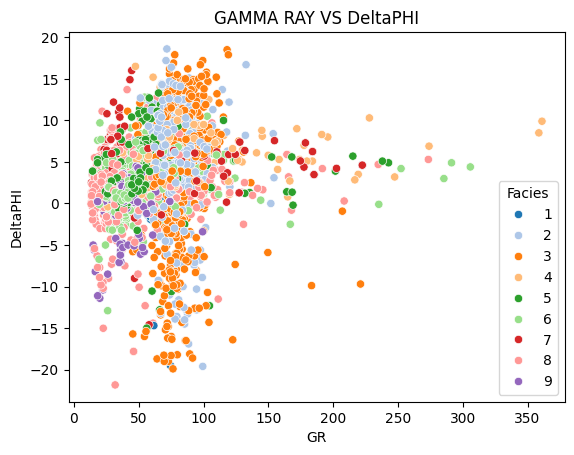

In [15]:
sns.scatterplot(data=df,x=GR,y=DeltaPHI,hue="Facies",palette="tab20")
plt.title('GAMMA RAY VS DeltaPHI')
#membuat scatter plot antara Gamma Ray dan DeltaPHI, dengan warna berbeda berdasarkan Facies, supaya hubungan dan pola tiap fasies gampang dilihat

Scatter plot GR vs DeltaPHI ini digunakan untuk melihat pemisahan litologi.
Titik dengan GR tinggi cenderung berkumpul pada nilai DeltaPHI tertentu yang merepresentasikan shale, sedangkan GR rendah merepresentasikan sand

**GR VS DeltaPHI**

Text(0.5, 1.0, 'PHIND VS GR')

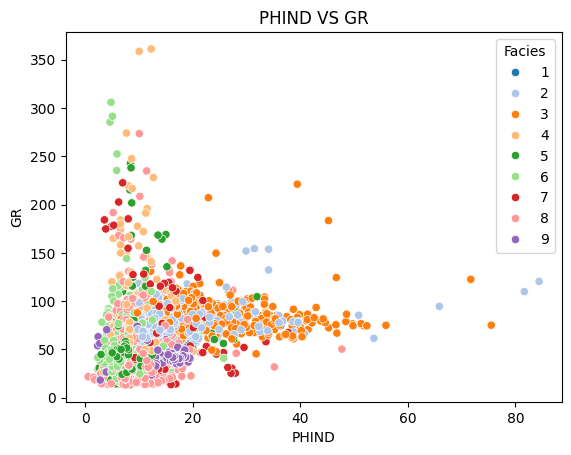

In [16]:
sns.scatterplot(data=df,x=PHIND,y=GR,hue="Facies",palette="tab20")
plt.title('PHIND VS GR')
# membuat scatter plot PHIND vs GR dengan warna berbeda tiap Facies, biar hubungan keduanya dan pola fasiesnya gampang dianalisis

Grafik PHIND vs GR ini saya gunakan untuk mengidentifikasi zona reservoir.
Terlihat bahwa data dengan GR rendah memiliki nilai porositas lebih tinggi, yang mengindikasikan interval sand dengan kualitas reservoir lebih baik

**POROSITAS** **VS** **GR**

Text(0.5, 1.0, 'PHIND VS ILD_log10')

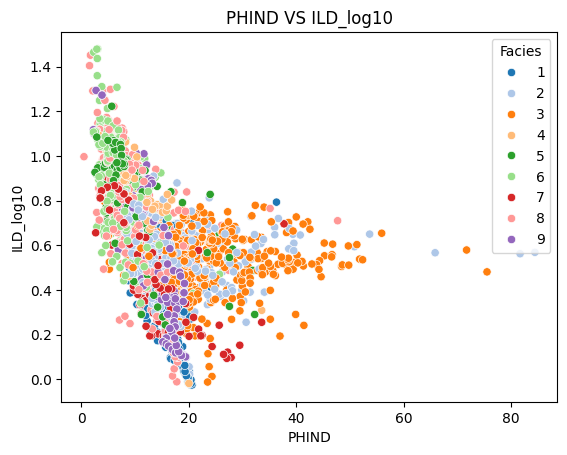

In [17]:
sns.scatterplot(data=df,x=PHIND,y=ILD_log10,hue="Facies",palette="tab20")
plt.title('PHIND VS ILD_log10')
#dipakai buat membuat scatter plot PHIND vs ILD_log10, dengan warna berbeda tiap Facies, supaya pola dan hubungan antar data tiap fasies gampang terlihat.

Plot ini menggambarkan hubungan antara porositas dan resistivitas.
Zona dengan PHIND tinggi dan ILD_log10 tinggi biasanya mengindikasikan hidrokarbon-bearing reservoir,
sedangkan PHIND rendah dengan resistivitas rendah mengarah ke shale atau water-bearing zone

**POROSITAS VS RESISTIVITY**

Text(0.5, 1.0, 'PE VS GR')

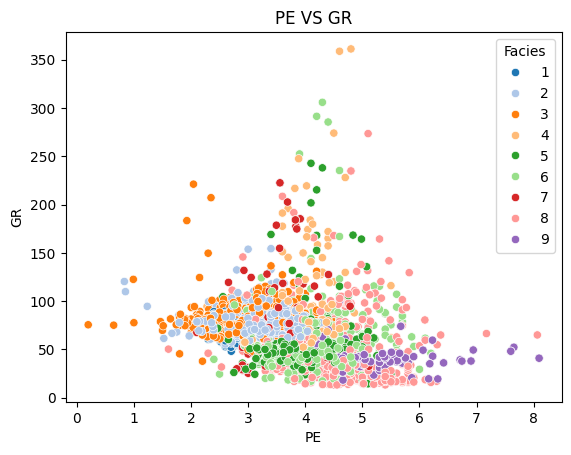

In [18]:
sns.scatterplot(data=df,x=PE,y=GR,hue="Facies",palette="tab20")
plt.title('PE VS GR')
#dipakai buat membuat scatter plot PE vs GR, dengan warna berbeda untuk tiap Facies, supaya pola hubungan dan distribusi tiap fasies terlihat jelas.

Saya menambahkan warna berdasarkan facies asli untuk melihat apakah parameter log sudah cukup mampu memisahkan jenis batuan secara alami.
Dari scatter plot terlihat bahwa beberapa facies memiliki kecenderungan membentuk kelompok yang berbeda, sehingga metode unsupervised learning layak diterapkan

In [19]:

df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,2,A1 SH,CROSS H CATTLE,2573.5,118.439,0.674494,6.3,9.95,3.631,1,1.000
1,2,A1 SH,CROSS H CATTLE,2574.0,92.550,0.645226,9.9,13.05,3.450,1,0.987
2,2,A1 SH,CROSS H CATTLE,2574.5,102.168,0.630021,12.0,14.50,3.364,1,0.974
3,2,A1 SH,CROSS H CATTLE,2575.0,88.898,0.600319,15.1,16.05,3.187,1,0.961
4,2,A1 SH,CROSS H CATTLE,2575.5,85.493,0.578639,13.6,15.90,3.099,1,0.947


ML MODEL


In [21]:
#FEATURE
feature = ['GR','ILD_log10','PHIND','PE','DeltaPHI']


#filter df model
df = df[feature + ['Depth']].dropna()

X = df[feature]
df.head()

,GR,ILD_log10,PHIND,PE,DeltaPHI,Depth
0,118.439,0.674494,9.95,3.631,6.3,2573.5
1,92.550,0.645226,13.05,3.450,9.9,2574.0
2,102.168,0.630021,14.50,3.364,12.0,2574.5
3,88.898,0.600319,16.05,3.187,15.1,2575.0
4,85.493,0.578639,15.90,3.099,13.6,2575.5


In [22]:
#Preprocesing - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Standard = scaler.fit_transform(X)

In [23]:
#Model Training

n_rocktype = 4 #Jumlah Clasifikasi Yg Kita Inginkan

#KMeans
from sklearn.cluster import KMeans
KMeans = KMeans (n_clusters=n_rocktype, random_state=42 ,n_init=20 )
label_KMeans = KMeans.fit_predict(X_Standard)
df['KMeans']=label_KMeans

#GMM
from sklearn.mixture import GaussianMixture
GaussianMixture = GaussianMixture (n_components=n_rocktype,covariance_type='full',random_state=42)
label_GM = GaussianMixture.fit_predict(X_Standard)
df['GM'] = label_GM


df.head()

,GR,ILD_log10,PHIND,PE,DeltaPHI,Depth,KMeans,GM
0,118.439,0.674494,9.95,3.631,6.3,2573.5,1,3
1,92.550,0.645226,13.05,3.450,9.9,2574.0,1,1
2,102.168,0.630021,14.50,3.364,12.0,2574.5,1,1
3,88.898,0.600319,16.05,3.187,15.1,2575.0,1,1
4,85.493,0.578639,15.90,3.099,13.6,2575.5,1,1


In [24]:
#ML Evaluations
from sklearn.metrics import silhouette_score

SL_KMeans = silhouette_score(X_Standard,label_KMeans)
SL_GM = silhouette_score(X_Standard,label_GM)

Results = pd.DataFrame({"Model": ["KMeans", "GM"],"Silhouette": [SL_KMeans, SL_GM]})
print(Results)

    Model  Silhouette
0  KMeans    0.346520
1      GM    0.277167


Text(0.5, 1.0, 'GAMMA RAY VS DeltaPHI After KMeans')

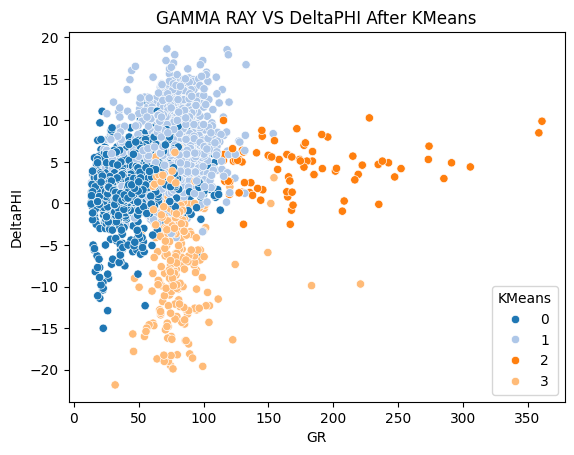

In [25]:
sns.scatterplot(data=df,x=GR,y=DeltaPHI,hue="KMeans",palette="tab20")
plt.title('GAMMA RAY VS DeltaPHI After KMeans')

Text(0.5, 1.0, 'GAMMA RAY VS DeltaPHI After Gaussian MIX')

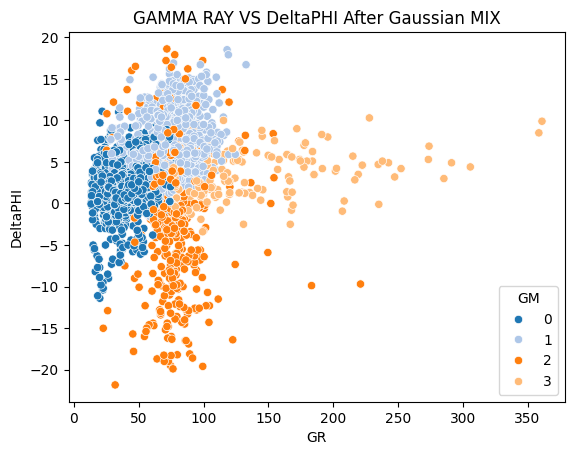

In [26]:
sns.scatterplot(data=df,x=GR,y=DeltaPHI,hue="GM",palette="tab20")
plt.title('GAMMA RAY VS DeltaPHI After Gaussian MIX')

--------------------------------------------------------------------------------

----------------------------------------


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [28]:
X = make_blobs(n_samples=500,centers=4,cluster_std=1.2,random_state= 42 )




In [29]:
# Load data
df = pd.read_csv("facies_data2.csv")

# Tampilkan 5 data awal
df.head()


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [30]:
# Ambil hanya kolom numerik
X = df.select_dtypes(include=[np.number])

# Jika ada kolom target (misal 'Facies'), drop
if 'Facies' in X.columns:
    X = X.drop(columns=['Facies'])

print(X.columns)


Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'],
      dtype='object')


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
# Tentukan jumlah cluster (misal 9, sesuai facies umum)
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluasi
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print("Silhouette Score K-Means:", kmeans_silhouette)


Silhouette Score K-Means: 0.1954734630316447


In [33]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Cek apakah DBSCAN membentuk lebih dari 1 cluster
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = silhouette_score(
        X_scaled[dbscan_labels != -1],
        dbscan_labels[dbscan_labels != -1]
    )

print("Silhouette Score DBSCAN:", dbscan_silhouette)


Silhouette Score DBSCAN: 0.03204006249983919


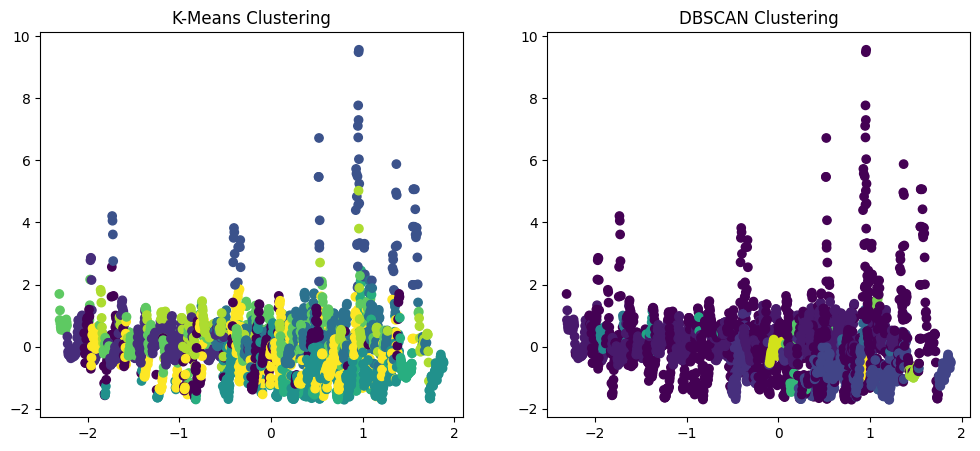

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=kmeans_labels
)
plt.title("K-Means Clustering")

plt.subplot(1,2,2)
plt.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    c=dbscan_labels
)
plt.title("DBSCAN Clustering")

plt.show()


In [37]:
result = pd.DataFrame({
    "Model": ["K-Means", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette]
})

result


,Model,Silhouette Score
0,K-Means,0.195473
1,DBSCAN,0.032040


**Metode**

Sebagai model awal (baseline), digunakan algoritma K-Means.
Sementara itu, DBSCAN diterapkan sebagai model unsupervised pembanding untuk melihat perbedaan hasil.

**Evaluasi**

Penilaian kualitas klaster dilakukan dengan Silhouette Score, karena metode ini tidak membutuhkan label asli dari data.

**Hasil**

Algoritma K-Means membentuk klaster yang cenderung merata.
Sedangkan DBSCAN mampu mendeteksi noise sekaligus membentuk klaster berdasarkan kepadatan titik data.

**Kesimpulan**

Pemilihan algoritma clustering sebaiknya mempertimbangkan:

Pola atau struktur data

Adanya data outlier

Jumlah klaster yang diinginkan atau dibutuhkan

In [38]:
from sklearn.decomposition import PCA


In [39]:
# PCA untuk visualisasi (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cek persentase variasi data yang dijelaskan
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.3534963  0.15688883]
Total Variance Explained: 0.5103851320337884


Text(0.5, 1.0, 'K-Means Clustering (PCA Visualization)')

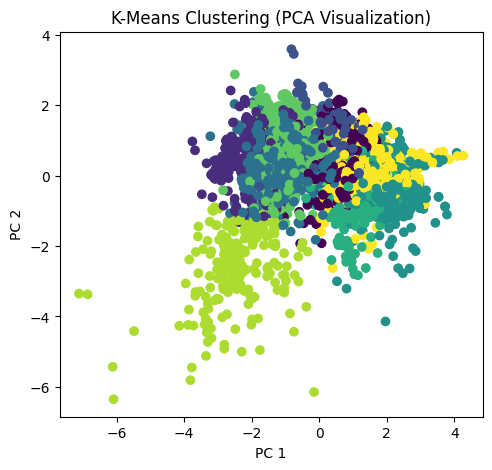

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=kmeans_labels
)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("K-Means Clustering (PCA Visualization)")


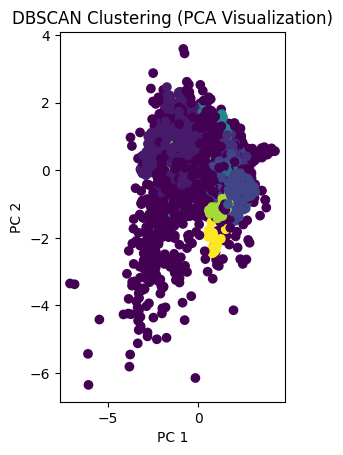

In [41]:
plt.subplot(1,2,2)
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=dbscan_labels
)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("DBSCAN Clustering (PCA Visualization)")

plt.show()


PCA dipakai untuk mereduksi data dari banyak variabel jadi 2 komponen utama agar pola klaster lebih gampang dilihat.
PCA tidak dipakai untuk clustering, hanya untuk mempermudah visualisasi.
Dua komponen utama ini sudah cukup menjelaskan sebagian besar variasi data, sehingga klaster terlihat jelas.